In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from itertools import combinations

df = pd.read_csv('games_elite.csv')
print(df.shape)
df.head()

(150, 27)


,year,region,round,high_bracket_seed,high_team_id,low_bracket_seed,low_team_id,win,wab,barthag,...,drb_pct,ftr,ftrd,2p_pct,2pd_pct,3p_pct,3pd_pct,3pr,3prd,adj_tempo
0,2021,East,Sweet 16,5,2021 Missouri St.,1,2021 Stanford,0,-8.3,-0.0461,...,42.0,-47.5,51.6,-17.3,3.6,-44.0,33.5,-37.1,28.4,-0.5
1,2021,East,Elite Eight,2,2021 Louisville,1,2021 Stanford,0,-5.0,-0.0141,...,31.0,-52.9,49.9,-11.0,6.2,-38.9,35.7,-31.8,35.0,-0.6
2,2021,Final Four,Final Four,1,2021 South Carolina,1,2021 Stanford,0,-2.3,-0.0051,...,36.1,-41.9,57.4,-17.3,8.4,-40.4,36.1,-45.2,40.4,1.5
3,2021,Final Four,Championship,3,2021 Arizona,1,2021 Stanford,0,-6.8,-0.0110,...,32.9,-48.4,52.2,-19.2,9.1,-42.2,31.1,-35.1,33.9,-0.4
4,2022,South,Sweet 16,5,2022 North Carolina,1,2022 South Carolina,0,-9.6,-0.0077,...,28.5,-49.7,48.2,-20.3,12.6,-41.8,42.1,-48.8,37.8,5.4


In [2]:
df['win'].value_counts(normalize=True)

0    0.5
1    0.5
Name: win, dtype: float64

In [3]:
df.columns

Index(['year', 'region', 'round', 'high_bracket_seed', 'high_team_id',
       'low_bracket_seed', 'low_team_id', 'win', 'wab', 'barthag', 'adj_oe',
       'adj_de', 'efg_pct', 'efgd_pct', 'tor', 'tord', 'orb_pct', 'drb_pct',
       'ftr', 'ftrd', '2p_pct', '2pd_pct', '3p_pct', '3pd_pct', '3pr', '3prd',
       'adj_tempo'],
      dtype='object')

In [4]:
split_df = df.drop(['year', 'region', 'round', 'high_bracket_seed', 'high_team_id', 'low_bracket_seed', 'low_team_id'],axis=1)
print(split_df.shape)
split_df.head()

(150, 20)


,win,wab,barthag,adj_oe,adj_de,efg_pct,efgd_pct,tor,tord,orb_pct,drb_pct,ftr,ftrd,2p_pct,2pd_pct,3p_pct,3pd_pct,3pr,3prd,adj_tempo
0,0,-8.3,-0.0461,-26.6,-2.0,-16.7,2.4,-58.5,57.7,-37.7,42.0,-47.5,51.6,-17.3,3.6,-44.0,33.5,-37.1,28.4,-0.5
1,0,-5.0,-0.0141,-13.3,-3.8,-10.0,5.3,-60.5,59.3,-39.9,31.0,-52.9,49.9,-11.0,6.2,-38.9,35.7,-31.8,35.0,-0.6
2,0,-2.3,-0.0051,-17.2,4.5,-15.5,7.1,-58.1,61.5,-31.2,36.1,-41.9,57.4,-17.3,8.4,-40.4,36.1,-45.2,40.4,1.5
3,0,-6.8,-0.0110,-23.9,5.0,-17.2,5.2,-59.0,55.5,-44.6,32.9,-48.4,52.2,-19.2,9.1,-42.2,31.1,-35.1,33.9,-0.4
4,0,-9.6,-0.0077,-26.4,15.0,-18.5,12.8,-62.2,52.3,-38.4,28.5,-49.7,48.2,-20.3,12.6,-41.8,42.1,-48.8,37.8,5.4


In [5]:
split_df.columns

Index(['win', 'wab', 'barthag', 'adj_oe', 'adj_de', 'efg_pct', 'efgd_pct',
       'tor', 'tord', 'orb_pct', 'drb_pct', 'ftr', 'ftrd', '2p_pct', '2pd_pct',
       '3p_pct', '3pd_pct', '3pr', '3prd', 'adj_tempo'],
      dtype='object')

In [6]:
X = df[['wab', 'barthag', 'adj_oe', 'adj_de', 'efg_pct', 'efgd_pct',
       'tor', 'tord', 'orb_pct', 'drb_pct', 'ftr', 'ftrd', '2p_pct', '2pd_pct',
       '3p_pct', '3pd_pct', '3pr', '3prd', 'adj_tempo']]
Y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(train_df.shape)
print(test_df.shape)

(105, 20)
(45, 20)


## I. Filter Methods

### A. Box Plots

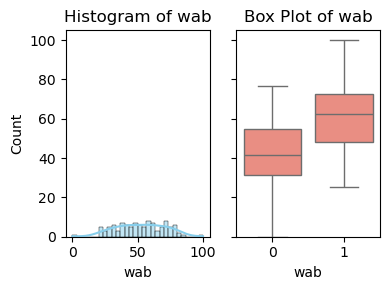

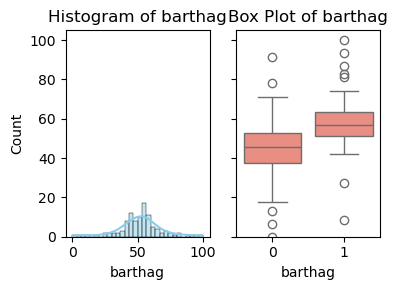

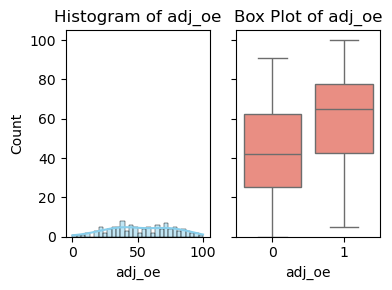

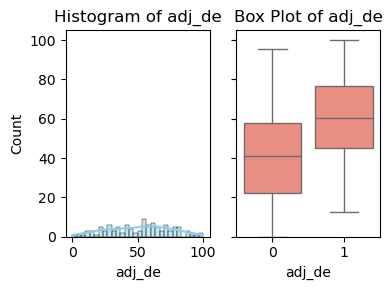

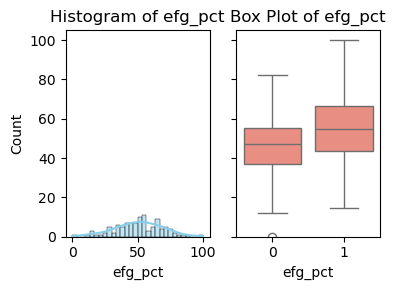

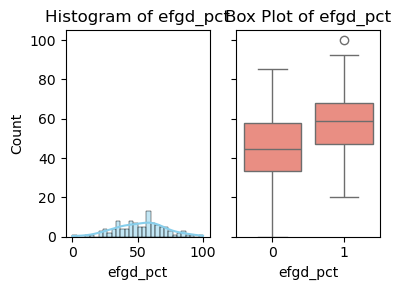

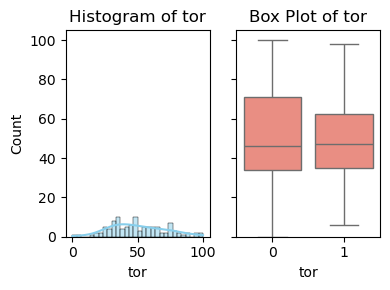

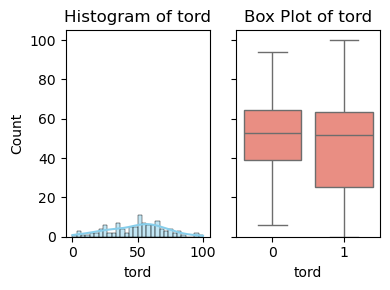

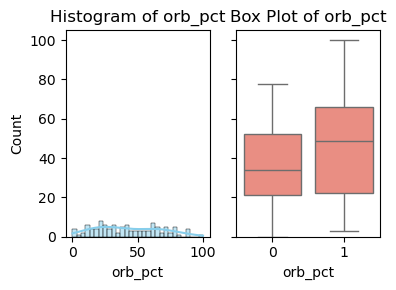

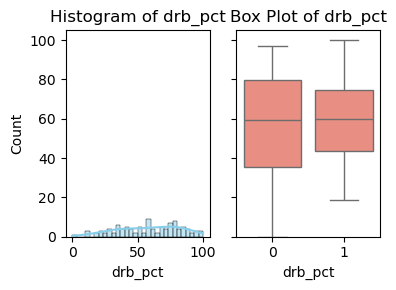

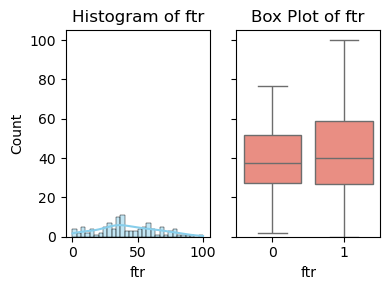

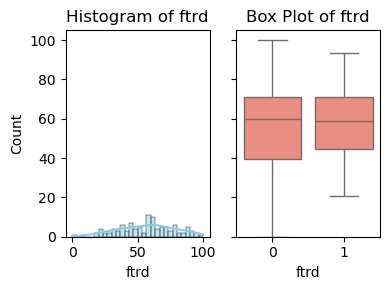

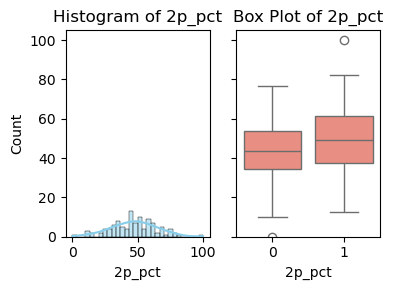

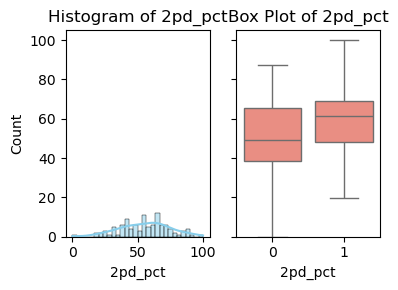

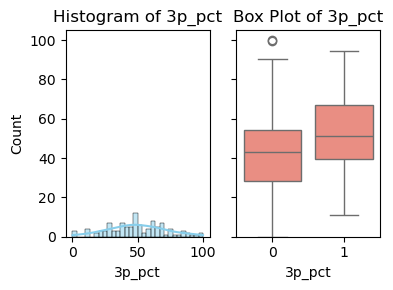

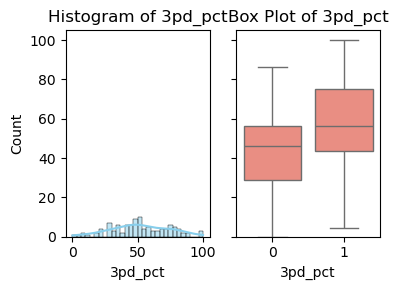

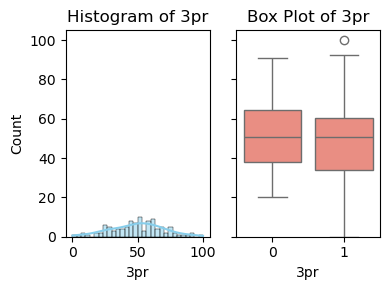

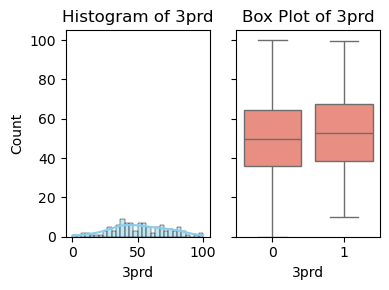

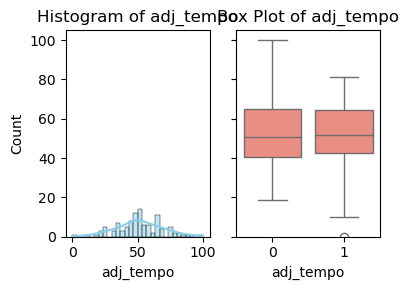

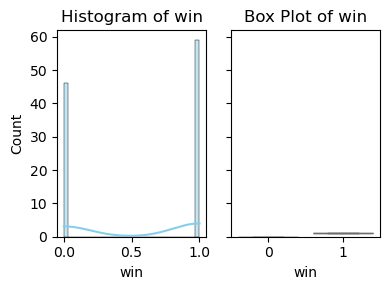

In [7]:
scaler = MinMaxScaler(feature_range=(0,100))
box_df = train_df
numeric_columns = train_df.drop(columns=['win']).columns
box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])

for column in box_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(4, 3), sharey=True)

    # Histogram on the left
    sns.histplot(box_df[column], kde=True, ax=axes[0], color='skyblue', bins=30)
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Box plot on the right
    sns.boxplot(x='win', y=column, data=box_df, ax=axes[1], color='salmon')
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

### B. Correlation

In [8]:
corr_matrix = train_df.corr()
correlation_with_target = round(abs(corr_matrix['win'])*100,2)
correlation_with_target = correlation_with_target[correlation_with_target >= 5]
print(correlation_with_target)

wab           46.83
barthag       43.29
adj_oe        35.90
adj_de        42.61
efg_pct       24.86
efgd_pct      32.63
tord          15.91
orb_pct       21.09
ftr           13.22
ftrd           6.96
2p_pct        23.80
2pd_pct       29.41
3p_pct        22.48
3pd_pct       31.13
3pr           12.77
adj_tempo      6.85
win          100.00
Name: win, dtype: float64


### C. Statistical Tests

In [9]:
X = train_df[['wab', 'barthag', 'adj_oe', 'adj_de', 'efg_pct', 'efgd_pct',
       'tor', 'tord', 'orb_pct', 'drb_pct', 'ftr', 'ftrd', '2p_pct', '2pd_pct',
       '3p_pct', '3pd_pct', '3pr', '3prd', 'adj_tempo']]
y = train_df['win']

# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,wab,28.937936,4.702553e-07,0.071179
1,barthag,23.758875,3.975324e-06,0.146502
2,adj_oe,15.241206,1.691814e-04,0.115028
3,adj_de,22.847893,5.848118e-06,0.194844
4,efg_pct,6.784081,1.055721e-02,0.017743
5,efgd_pct,12.271253,6.818900e-04,0.120293
6,tor,0.064322,8.002959e-01,0.000000
7,tord,2.673300,1.050968e-01,0.000000
8,orb_pct,4.792522,3.084138e-02,0.018714
9,drb_pct,0.167227,6.834374e-01,0.010970


In [10]:
feature_df = stats_df[stats_df['mutual_info'] > 0]
feature_df

,feature,f_values,p_values,mutual_info
0,wab,28.937936,4.702553e-07,0.071179
1,barthag,23.758875,3.975324e-06,0.146502
2,adj_oe,15.241206,1.691814e-04,0.115028
3,adj_de,22.847893,5.848118e-06,0.194844
4,efg_pct,6.784081,1.055721e-02,0.017743
5,efgd_pct,12.271253,6.818900e-04,0.120293
8,orb_pct,4.792522,3.084138e-02,0.018714
9,drb_pct,0.167227,6.834374e-01,0.010970
12,2p_pct,6.186818,1.447576e-02,0.111556
13,2pd_pct,9.753172,2.324493e-03,0.030547


## II. Wrapper Methods

### A. Forward Selection

In [11]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Forward Selection using AIC
def forward_selection_logistic_aic(X_train, y_train, X_test, y_test):
    selected_features = []
    remaining_features = list(X_train.columns)  # Column names
    best_f1_train = 0
    best_f1_test = 0
    best_aic = np.inf  # Start with a large AIC value
    
    while remaining_features:
        aic_list = []
        f1_train_list = []
        f1_test_list = []
        
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_train_subset = X_train[current_features]
            X_test_subset = X_test[current_features]
            
            # Add constant for intercept (statsmodels requires constant)
            X_train_subset_sm = sm.add_constant(X_train_subset)
            X_test_subset_sm = sm.add_constant(X_test_subset)
            
            # Fit the logistic regression model using statsmodels (to compute AIC)
            model = sm.Logit(y_train, X_train_subset_sm)
            result = model.fit()
            
            aic = result.aic  # Extract AIC value
            aic_list.append(aic)
            
            # Now, use sklearn for F1 score calculation
            log_reg_model = LogisticRegression(solver='liblinear')
            log_reg_model.fit(X_train_subset, y_train)  # Fit model without constant term
            
            # Make predictions on both train and test data
            y_train_pred = log_reg_model.predict(X_train_subset)
            y_test_pred = log_reg_model.predict(X_test_subset)
            
            # Calculate F1 scores
            f1_train = f1_score(y_train, y_train_pred)
            f1_test = f1_score(y_test, y_test_pred)
            
            f1_train_list.append(f1_train)
            f1_test_list.append(f1_test)
        
        # Select the feature that gives the lowest AIC
        best_feature_idx = np.argmin(aic_list)
        selected_features.append(remaining_features[best_feature_idx])
        remaining_features.remove(remaining_features[best_feature_idx])
        
        best_aic = aic_list[best_feature_idx]
        best_f1_train = f1_train_list[best_feature_idx]
        best_f1_test = f1_test_list[best_feature_idx]
        
    return selected_features, best_aic, best_f1_train, best_f1_test

# Perform forward selection using AIC
selected_features, best_aic, best_f1_train, best_f1_test = forward_selection_logistic_aic(
    X_train, y_train, X_test, y_test
)

# Output the results
print("Selected Features:", selected_features)
print("Best AIC:", best_aic)
print("Best F1 Score on Training Set:", best_f1_train)
print("Best F1 Score on Test Set:", best_f1_test)

# Create the final Logistic Regression model using selected features
log_reg_final = LogisticRegression(solver='liblinear')
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]

# Fit the final model
log_reg_final.fit(X_train_final, y_train)

# Make predictions on training and testing sets
y_train_pred_final = log_reg_final.predict(X_train_final)
y_test_pred_final = log_reg_final.predict(X_test_final)

# Evaluate using F1 score
final_f1_train = f1_score(y_train, y_train_pred_final)
final_f1_test = f1_score(y_test, y_test_pred_final)

print("Final F1 Score on Training Set:", final_f1_train)
print("Final F1 Score on Test Set:", final_f1_test)

Optimization terminated successfully.
         Current function value: 0.564503
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574619
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.617918
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588069
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.653632
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629296
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.685151
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672640
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662792
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.684653
  

### B. Recursive Feature Elimination

In [12]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to keep track of column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Create a Logistic Regression model
log_reg = LogisticRegression(solver='liblinear')

# Initialize RFE with logistic regression as the model and the number of features to select
rfe = RFE(estimator=log_reg, n_features_to_select=8)  # Select top 12 features

# Fit RFE on the scaled training data
rfe.fit(X_train_scaled, y_train)

# Get the selected features (column names)
selected_features = X_train_scaled.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train a logistic regression model using only the selected features
log_reg.fit(X_train_scaled[selected_features], y_train)

# Make predictions on both training and testing datasets
y_train_pred = log_reg.predict(X_train_scaled[selected_features])
y_test_pred = log_reg.predict(X_test_scaled[selected_features])

# Evaluate the F1 score on both training and testing datasets
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

# Output the results
print("F1 Score on Training Set:", acc_train)
print("F1 Score on Test Set:", acc_test)

Selected Features: Index(['wab', 'barthag', 'adj_oe', 'adj_de', 'tord', 'ftrd', '3p_pct', '3prd'], dtype='object')
F1 Score on Training Set: 0.780952380952381
F1 Score on Test Set: 0.6888888888888889


### C. Lasso Regression

In [13]:
# Create a Lasso Logistic Regression model (penalty='l1' for Lasso)
lasso_log_reg = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000)

# Fit the model on the training data
lasso_log_reg.fit(X_train_scaled, y_train)

# Make predictions on both training and testing datasets
y_train_pred = lasso_log_reg.predict(X_train_scaled)
y_test_pred = lasso_log_reg.predict(X_test_scaled)

# Evaluate the F1 score on both training and testing datasets
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

# Output the results
print("Accuracy Score on Training Set:", acc_train)
print("Accuracy Score on Test Set:", acc_test)

# Get the non-zero coefficients (selected features) from the Lasso model
selected_features = X.columns[(lasso_log_reg.coef_ != 0).flatten()]
print("Selected Features (Columns used in the model):", selected_features)

Accuracy Score on Training Set: 0.7904761904761904
Accuracy Score on Test Set: 0.7555555555555555
Selected Features (Columns used in the model): Index(['wab', 'barthag', 'adj_oe', 'adj_de', 'tord', 'orb_pct', 'drb_pct',
       'ftr', 'ftrd', '3p_pct', '3pr', '3prd'],
      dtype='object')


## IV. Exhaustive Feature Selection

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled2 = X_train_scaled[[
       'wab', 'barthag', 'adj_oe', 'adj_de', 'efg_pct', 'efgd_pct',
       'orb_pct', 'drb_pct', '2p_pct', '2pd_pct',
       '3p_pct', '3pd_pct', '3pr'
]]

X_test_scaled2 = X_test_scaled[[
       'wab', 'barthag', 'adj_oe', 'adj_de', 'efg_pct', 'efgd_pct',
       'orb_pct', 'drb_pct', '2p_pct', '2pd_pct',
       '3p_pct', '3pd_pct', '3pr'
]]

In [15]:
# Initialize variables to track the best model
best_acc = 0
best_features = []
best_train_acc = 0

# Iterate over all possible subsets of features
for k in range(1, len(X_train_scaled2.columns) + 1):
    for subset in combinations(X_train_scaled2.columns, k):
        X_train_subset = X_train_scaled2[list(subset)]
        X_test_subset = X_test_scaled2[list(subset)]
        
        # Train the model with the subset of features
        log_reg.fit(X_train_subset, y_train)
        
        # Make predictions on the test set
        y_test_pred = log_reg.predict(X_test_subset)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        # Make predictions on the training set
        y_train_pred = log_reg.predict(X_train_subset)
        train_acc = accuracy_score(y_train, y_train_pred)
        
        # Track the best subset based on test F1 score
        if test_acc > best_acc:
            best_acc = test_acc
            best_features = subset
            best_train_acc = train_acc

# Output the best feature subset and the F1 scores
print(f"Best Feature Subset: {best_features}")
print(f"Best Test Accuracy Score: {best_acc:.4f}")
print(f"Training Accuracy Score of Best Model: {best_train_acc:.4f}")

Best Feature Subset: ('wab', 'adj_oe', 'adj_de')
Best Test Accuracy Score: 0.8222
Training Accuracy Score of Best Model: 0.7524


## V. XGBoost

In [16]:
import optuna
import xgboost as xgb

In [17]:
# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': 'gbtree',
        'tree_method': 'auto',
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        'min_child_weight': trial.suggest_float("min_child_weight", 1, 10),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'gamma': trial.suggest_float("gamma", 0, 5),
        'reg_alpha': trial.suggest_float("reg_alpha", 0, 10),  # L1 regularization
        'reg_lambda': trial.suggest_float("reg_lambda", 0, 10),  # L2 regularization
        'n_estimators': trial.suggest_int("n_estimators", 50, 500)
    }

    # Train model
    model = xgb.XGBClassifier(**param, use_label_encoder=False, verbosity=0)
    model.fit(X_train_scaled2, y_train)

    # Predict and calculate accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train_scaled2))
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled2))

    # Log both accuracies
    trial.set_user_attr("train_accuracy", train_acc)
    trial.set_user_attr("test_accuracy", test_acc)

    return test_acc  # Optimization target

In [18]:
# Run the study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

# Print best trial
best = study.best_trial
print("Best Trial:")
print(f"  Test Accuracy: {best.value:.4f}")
print(f"  Train Accuracy: {best.user_attrs['train_accuracy']:.4f}")
print("  Params:")
for key, value in best.params.items():
    print(f"    {key}: {value}")

[I 2025-07-13 06:51:19,817] A new study created in memory with name: no-name-eba7c9c2-9ec3-4670-8cf1-84b220d24268
[I 2025-07-13 06:51:20,024] Trial 0 finished with value: 0.7333333333333333 and parameters: {'learning_rate': 0.18778037412468956, 'max_depth': 10, 'min_child_weight': 1.271777041967456, 'subsample': 0.7669110189142986, 'colsample_bytree': 0.7933821413976724, 'gamma': 3.961598342239689, 'reg_alpha': 0.007960035876729554, 'reg_lambda': 4.2192478600369965, 'n_estimators': 442}. Best is trial 0 with value: 0.7333333333333333.
[I 2025-07-13 06:51:20,124] Trial 1 finished with value: 0.7111111111111111 and parameters: {'learning_rate': 0.24737913929714403, 'max_depth': 9, 'min_child_weight': 4.070089574416845, 'subsample': 0.649935027789754, 'colsample_bytree': 0.5974589287382277, 'gamma': 4.7551520401308585, 'reg_alpha': 2.202995633112592, 'reg_lambda': 9.14585794697078, 'n_estimators': 172}. Best is trial 0 with value: 0.7333333333333333.
[I 2025-07-13 06:51:20,353] Trial 2 fi

Best Trial:
  Test Accuracy: 0.8444
  Train Accuracy: 0.7714
  Params:
    learning_rate: 0.2997738363859162
    max_depth: 9
    min_child_weight: 8.623522034407337
    subsample: 0.8324211691115178
    colsample_bytree: 0.9988769480719698
    gamma: 2.017715776385069
    reg_alpha: 0.9692563913308194
    reg_lambda: 2.5910989850621258
    n_estimators: 335
